In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
stats.chisqprob=lambda chisq, df: stats.chi2.sf(chisq, df)

In [59]:
data=pd.read_csv('2.01.+Admittance.csv')

In [61]:
data1=data.copy()
data1['Admitted']=data1['Admitted'].map({'Yes':1,'No':0})
data1

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [63]:
y=data1['Admitted']
x1=data1['SAT']

In [67]:
#Logit method takes as arguments DV and IV
x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
results_log=reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [15]:
#Optimization terminated successfully means we managed to fit the reg, it took 10 iterations, current f value mean SM uses a ML  algo to fit the reg, 
#it shows the value of the obj f. There's always a possibility that after a certain no of iterations, the model won't learn, therefore it can't 
#optimize the optimization f. In SM the max no of iterations is 35, after that it will stop trying, and you'll recieve an error   

In [69]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sat, 04 Jan 2025   Pseudo R-squ.:                  0.7992
Time:                        18:57:48   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [39]:
#MLE is maximum Likelihood Estimation. Likelihood f estimates how likely it is that the model describes var's real underlying relationship. Bigger the 
#likelihood f, higher the prob that our model is correct. MLE tries to maximize the likelihood f.
#The computer is going through diff values until it finds a model for which the likelihood is highest. When it can no longer improve it, it will stop 
#the optimization. That's how any ML process works
#Log likelihood is a more popular metric. Its value is almost, but not always neg, and the bigger it is the better. A higher log-likelihood indicates a 
#better fit of the model to the data.
#LL-Null (log likelihood-null) is the log likelihood of a model which has no IVs, y=bo*1, 1 is the array added by add_constant method
#Model's log likelihood can be compared with LL-null to see if model has any explanatory power
#Log likelihood ratio (LLR) test is based on model's log likelihood and LL-Null. It measures if our model is statistically diff from LLNull, AKA a 
#useless model. Lower it's p-value, higher the significance of model    
#There's no such thing as a clearly defined R-squared for log reg. Pseudo R-squared is McFadden's R-squared. A good pseudo R-squared is somewhere bw 
# 0.2 to 0.4. It's more useful for comparing variations of same model. Diff models will have diff and incomparable Pseudo R-squares              
# The Logit model is log(pi/1-pi)=-69.91 + .042*SAT. pi here is prob  of an event occuring, 1-pi is prob of an event not occuring, it's called odds 
#To interpret the model, we'll take 2 SAT scores, SAT1 and SAT2. using them we get 2 equations. log(odd2)=-69.91+0.042*SAT2 and 
#log(odds1)=-69.91+0.042*SAT1. Substracting them to take their difference, log(odds2)-log(odds1)=0.042(SAT2-SAT1). Difference bw logs is log of the 
#quotiont of their arguments, therefore log(odd2/odds1)=0.042(SAT2-SAT1). When diff bw SAT score is 1, log(odds2/odds1)=0.042*1,  taking exponential on 
#both sides as e^log x=x, e^log(odds2/odds1)=e^0.042, we get odds2/odds1=1.042, this can bre rearranged to odds2=1.042*odds1 or odds2=104.2%* of odds1, 
#ie odds2 is 4.2% higher than odds1. When SATscore increases by 1, the odds of admittance increases by 4.2%   
#he general rule is for a unit change in a var, the change in odds=e^bk, where k is in subscript below b, it means change in odds= exponential of coef
#it provides a way to interpret the coef of log reg
#to find diff of 10 units of SAT, log(odd2/odds1)=0.042*10, solving it, the odds increase by 52%, odds2=152%*odds1

C:\Users\navee\AppData\Local\Temp\ipykernel_13276\1822852993.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0=results_log.params[0]
C:\Users\navee\AppData\Local\Temp\ipykernel_13276\1822852993.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1=results_log.params[1]


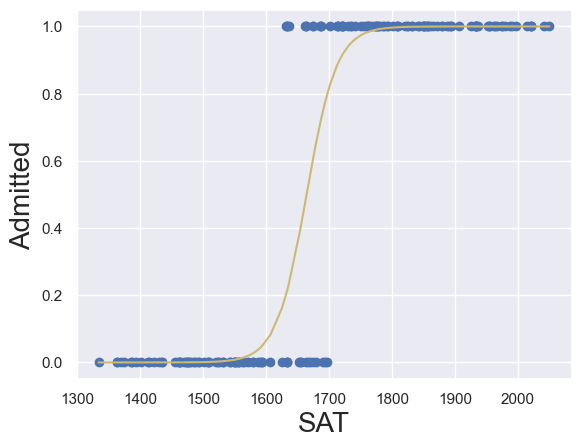

In [71]:
#params takes the parameter,ie coeffs stored in results for intercept (bo) and slope (b1)
b0=results_log.params[0] 
b1=results_log.params[1]
#Sorting values for smooth plotting of logistic regression curve
x_sorted=np.sort(x1)
#Creating Logistic regression model
f_sorted=np.exp(b0 + b1*x_sorted)/(1+np.exp(b0+b1*x_sorted))
#Storing predicted values in a var
f_values=np.array(np.exp(b0+b1*x_sorted)/(1+np.exp(b0+b1*x_sorted)))
#plotting values 
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

In [87]:
#to test accuracy
# This is a method to change the formatting of np arrays
np.set_printoptions(formatter={'float':lambda x:"{0:0.2f}".format(x)})
# Should you want to go back to the default formatting, uncomment and execute the line below
#np.set_printoptions(formatter=None)
#we get probs of being admitted. Values below 0.5 means there's less than 50% chance of admission, so we can round them down, and round up values above 
#0.5
results_log.predict()

array([0.00, 1.00, 1.00, 0.38, 0.05, 0.98, 0.99, 1.00, 1.00, 0.03, 1.00,
       1.00, 0.50, 0.00, 0.77, 1.00, 0.21, 0.22, 0.23, 1.00, 1.00, 1.00,
       0.00, 0.00, 0.91, 1.00, 0.22, 1.00, 1.00, 0.98, 0.00, 0.61, 0.41,
       1.00, 1.00, 1.00, 0.50, 1.00, 0.39, 0.00, 0.04, 0.20, 1.00, 0.00,
       1.00, 0.00, 0.98, 0.00, 0.00, 0.01, 0.01, 1.00, 0.80, 0.01, 1.00,
       0.00, 0.56, 0.95, 0.22, 0.99, 0.01, 0.89, 1.00, 1.00, 0.99, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.89, 0.22, 0.00, 1.00, 1.00, 1.00, 0.00,
       0.49, 1.00, 1.00, 0.01, 1.00, 1.00, 0.65, 1.00, 1.00, 0.00, 1.00,
       0.99, 0.72, 0.60, 0.00, 0.95, 0.91, 0.00, 1.00, 1.00, 0.01, 0.98,
       0.88, 0.99, 0.00, 0.99, 0.03, 0.00, 0.99, 0.99, 1.00, 0.00, 0.00,
       0.04, 0.52, 0.00, 1.00, 0.16, 0.00, 0.92, 0.00, 0.47, 1.00, 1.00,
       0.02, 0.00, 0.00, 1.00, 0.01, 0.96, 0.75, 0.72, 0.94, 0.60, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.08, 0.00, 0.01, 1.00, 0.98, 0.70,
       0.99, 1.00, 0.02, 0.00, 0.00, 0.00, 0.83, 1.

In [89]:
np.array(data1['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [91]:
#if 80% of predicted values coincide with actual values, we say model has 80% accuracy
#sm.LogitResults.pred_table() returns a table which compares predicted and actual values
results_log.pred_table()

array([[67.00, 7.00],
       [7.00, 87.00]])

In [79]:
cm_df=pd.DataFrame(results_log.pred_table())
cm_df.columns=['Predicted 0','Predicted 1']
cm_df=cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,67.0,7.0
Actual 1,7.0,87.0


In [45]:
#It's called a confusion matrix as it shows how confused model is
#for 67 observationss model predicted 0 and true value was 0
#for 87 obs model predicted 1 and true value was 1
#here the model performed well
#but in 7 obs model predicted 0 while true value was 1
# andfor 7 obs model predicted 1 while true value was 0
#model made accurate predictions in 154 out of 168 cases, so
accuracy=(154/168)*100

In [47]:
accuracy

91.66666666666666

In [51]:
#model is 91.6% accurate
cm=np.array(cm_df)
accuracy_train=(cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9166666666666666

In [5]:
#opposite of accuracy is misclassification rate. it =missclassified elements/ all elements
print('Misclassification rate = '+str((14/168)*100))

Misclassification rate = 8.333333333333332
